<a href="https://colab.research.google.com/github/Demonious/CEV-DataScience-Tasks/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 # **Warehouse Optimization**

* Motor Clustering




*   Ali ÇALIŞKAN
* December 2022




# Abstract

* Placing the post-production product in the final product warehouse is a challenging procedure that needs to be managed and controlled extremely carefully in terms of lean production. The big storage area requires a considerable workforce for product placement and pickup, as well as the expense of the tools used to carry out these tasks, while this process is being handled. In this study, a recommendation system for warehouse placement is developed, which will lessen the workload placed on humans throughout the warehouse placement procedure. A clustering technique based on warehouse placement histories has been developed for this project. Running different clustering algorithms has resulted in a solution to a real-world issue.Kmeans, DBscan, and GMM clustering algorithms are used, and the outcomes are compared. After clustering, a system for recommending where to store a product has been created.

# Literature Review

* Raw materials, semi-finished goods, and finished goods must physically be moved from one location to another in order for the items to be delivered to the final consumer. The products are held at certain locations during these transit activities between the supply and demand points until the demand occurs. These locations are warehouses where staff members wait till a consumer request is received. Today's warehouses serve as both storage facilities for goods and operational hubs for procedures such as order picking, control, packaging, and shipping. Entry operations include accepting products and arranging them on shelves. Healthy management of customer needs, warehouse space consumption, stock level, warehouse and distribution are necessary for successful warehouse management.Healthy management of customer needs, warehouse space consumption, stock level, warehousing and distribution expenses, and new information technologies are necessary for a successful warehouse operation.

* In a warehouse, order picking accounts for 40% to 60% of all labor costs. Order picking expenses make around 55% of a warehouse's overall expenses. Some research claim that this percentage is between 60 and 65 percent. Therefore, warehouse managers and academics who wish to cut costs must make good use of the warehouse.Order grouping, which is the issue of identifying the orders that must be collected all at once, is crucial to the management of warehouse operations since it cuts down on both warehouse costs and circulation distance. When the literature is explored, it becomes clear that several heuristic solutions to the order grouping problem have been put forth. He investigated the grouping problem heuristics that had been created. In many of the research-tested approaches, a core order is originally chosen, and the remaining orders are given to the group based on how close they are to this order while still staying within the shelf capacity. With the help of this technique, the density of orders in the same group is consolidated to one.This technique allows the density of orders from the same group to congregate at a single spot.

#Motivation


*   By making improvements on a warehouse that continues to work, to make it better. In this way, to increase efficiency by consuming less labor and energy.

*   Placement suggestion of new engines according to engine specifications.(Future Works)



# Importing Libraries


In [4]:
import pandas as pd  
import numpy as np  
from google.colab import drive 
drive.mount('/content/drive')
from datetime import datetime 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preperation

In [2]:
depohareket = pd.read_csv('/content/drive/Shareddrives/VoltMotor/Data/finalMotorDataCleaned_13102022.csv')
depogecmisi = pd.read_csv('/content/drive/Shareddrives/VoltMotor/Data/DepoGeçmişi.csv', sep=';')
sm = pd.read_csv('/content/drive/Shareddrives/VoltMotor/Data/shelfMatrix.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
depohareket.head(3)

,serial_id,serial_no,material,prod_date,sup,out_date,dlv,dlv_date,Stok,material_id,...,Gövde,Güç [kW],Ürün Tipi,Ürün Flanş,Yapı Şekli,İmalat Tipi,Verim Sınıfı,Kutup Sayısı,AGIRLIK,Stok_Devir_Hızı(Gün)
0,3000001,MP02011808,VSPA90S4AB342MIS,2020-05-09 14:18:47.587,2976486.0,2020-05-21 08:14:07.587,NaN,2020-05-20 00:00:00.000,0,50320,...,90S,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,11.746759
1,3000002,MP02011809,VSPA90S4AB342MIS,2020-05-09 14:18:42.573,2976486.0,2020-05-21 08:14:07.587,NaN,2020-05-20 00:00:00.000,0,50320,...,90S,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,11.746817
2,3000003,MP02011810,VSPA90S4AB342MIS,2020-05-09 14:18:35.430,2976486.0,2020-05-21 08:14:07.587,NaN,2020-05-20 00:00:00.000,0,50320,...,90S,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,11.746900


In [5]:
depohareket["Gövde"].unique
n = (pd.unique(depohareket['Gövde']))
print(n)


['90S' '80M' '112M' '160M' '90L' '100L' '160L' '71M' '250M' '132M' '63M'
 '225S' '225M' '132S' '180M' '180L' '280S' '315M' '200L' '280M' '315S'
 '315L' '355L']


In [6]:
govde_rep = depohareket['Gövde'].replace(to_replace={'90S':'90', '80M':'80', '112M':'112', '160M':'160', '90L':'90', '100L':'100', '160L':'160', '71M':'71', '250M':'250', '132M':'132', '63M':'63',
 '225S':'225', '225M':'225', '132S':'132', '180M':'180', '180L':'180', '280S':'280', '315M':'315', '200L':'200', '280M':'280', '315S':'315',
 '315L':'315', '355L':'355'})

In [7]:
govde_rep.unique
h = (pd.unique(govde_rep))
print(h)


['90' '80' '112' '160' '100' '71' '250' '132' '63' '225' '180' '280' '315'
 '200' '355']


In [8]:
depohareket["Gövde"]=govde_rep

In [9]:
depohareket.head(3)

,serial_id,serial_no,material,prod_date,sup,out_date,dlv,dlv_date,Stok,material_id,...,Gövde,Güç [kW],Ürün Tipi,Ürün Flanş,Yapı Şekli,İmalat Tipi,Verim Sınıfı,Kutup Sayısı,AGIRLIK,Stok_Devir_Hızı(Gün)
0,3000001,MP02011808,VSPA90S4AB342MIS,2020-05-09 14:18:47.587,2976486.0,2020-05-21 08:14:07.587,NaN,2020-05-20 00:00:00.000,0,50320,...,90,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,11.746759
1,3000002,MP02011809,VSPA90S4AB342MIS,2020-05-09 14:18:42.573,2976486.0,2020-05-21 08:14:07.587,NaN,2020-05-20 00:00:00.000,0,50320,...,90,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,11.746817
2,3000003,MP02011810,VSPA90S4AB342MIS,2020-05-09 14:18:35.430,2976486.0,2020-05-21 08:14:07.587,NaN,2020-05-20 00:00:00.000,0,50320,...,90,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,11.746900


In [10]:
depogecmisi.head()

,material,bin,sys_date,operation_type,qty,serial_id
0,MLZ001,-,2017-04-04 13:50:03.707,T001,5,4
1,MLZ001,-,2017-04-04 13:57:24.620,T001,5,4
2,MLZ001,G001,2017-04-04 14:04:20.760,T001,5,4
3,MLZ001,G002,2017-04-04 14:05:02.003,T002,5,4
4,MLZ001,G001,2017-04-05 10:50:06.947,T001,5,10


* Choosing "T002" for the indoor movements

In [11]:
depogecmisi_v2 = depogecmisi[depogecmisi.operation_type.isin(["T002"])]
depogecmisi_v2

,material,bin,sys_date,operation_type,qty,serial_id
3,MLZ001,G002,2017-04-04 14:05:02.003,T002,5,4
9,MLZ001,G002,2017-04-05 10:53:51.563,T002,5,10
10,MLZ002,G002,2017-04-05 10:53:51.563,T002,1,10
17,MT1G1C1600372,-,2017-05-24 11:47:52.517,T002,1,439
27,MT1G1C1600372,A1-01,2017-07-05 16:30:53.877,T002,2,9507
...,...,...,...,...,...,...
320194,STA7LT750H52,-,2022-10-04 13:23:43.557,T002,1,7715507
320195,STA43T400HA4YY,-,2022-10-04 13:23:43.557,T002,1,7699558
320196,STA43T400HA4YY,-,2022-10-04 13:23:43.557,T002,1,7872374
320199,V3EA80M4IB3440YY,V8-02,2022-10-04 13:27:27.540,T002,70,8089093


In [12]:
depogecmisi["sys_date"] = pd.to_datetime(depogecmisi_v2["sys_date"])
warehouse_change_date = datetime(2020, 3, 1, 0, 0, 0, 0)
depogecmisi = depogecmisi[depogecmisi["sys_date"] >= warehouse_change_date]

Getting unique motor material values from dataframe

In [13]:
motor_material = (pd.unique(depohareket['material']))
motor_material = pd.DataFrame(data=motor_material, columns=["material"])

In [14]:
motor_material

,material
0,VSPA90S4AB342MIS
1,MM1G1C1400372
2,VSPA90S4AB344MIS
3,VSPA90S4AB340MIS
4,V2EA112M4FB3440YY
...,...
5254,VSSA71M4AB3460
5255,V1EA132S4AB338BD
5256,V1EA180L4CB538BD
5257,VSSA100M4CB70VLA


Searching unique values in "Depogecmisi_v2" dataframe and joining the tables

In [15]:
inner_merged = pd.merge(depogecmisi_v2, motor_material)
inner_merged.head()

,material,bin,sys_date,operation_type,qty,serial_id
0,MT1G1C1600372,-,2017-05-24 11:47:52.517,T002,1,439
1,MT1G1C1600372,A1-01,2017-07-05 16:30:53.877,T002,2,9507
2,MT1G1C1600372,S12-01,2017-07-21 10:33:08.017,T002,80,888
3,MT1G1C1600372,S11-03,2017-07-28 15:43:36.943,T002,80,39035
4,MT1G1C1600372,-,2017-08-11 09:57:14.833,T002,5,110373


Preparing shelves for the clustering

*   Droping the dysfunctional shelves

In [15]:
my_shelves = ("A","B","C","D","E","F","K","G","R","S","T","U","V","X")
inner_merged["bin_check"] = inner_merged["bin"].str.startswith(my_shelves)
depogecmisi_v2 = inner_merged[inner_merged["bin_check"] == True]
depogecmisi_v2 = depogecmisi_v2.drop(columns = "bin_check")

drp_list3 = ["SUN-1", "SUN-2","REWORK"]

for shelf in drp_list3:
  depogecmisi_v2 = depogecmisi_v2[~depogecmisi_v2['bin'].astype(str).str.startswith(shelf)]


a = depogecmisi_v2[depogecmisi_v2['bin'].astype(str).str.startswith("S")]
a = a.sort_values("bin")
unq_list = list(a["bin"].unique())


drp_list4 = ["R10", "R11", "R12", "S10", "S11", "S12", "T11", "T12", "U10", "U11", "U12", "V12"]

for shelf in drp_list4:
  depogecmisi_v2 = depogecmisi_v2[~depogecmisi_v2['bin'].astype(str).str.startswith(shelf)]

Simlifyişng the Shelf Names

In [16]:
def bins_level(my_df):
  my_bins = my_df["bin"].to_numpy()
  for i in range(len(my_bins)):
    if ("-") in (my_bins[i]):
      a = my_bins[i]
      my_bins[i] = (a.split("-")[0])
    else:
      pass
  my_df["bins"] = my_bins
  return my_df

In [17]:
depogecmisi_v2 = bins_level(depogecmisi_v2)

In [18]:
trans_for_bin_all = depogecmisi_v2.groupby('bin')["qty"].sum()
trans_for_bin_all = trans_for_bin_all.reset_index()
trans_for_bin_all["bin"] = trans_for_bin_all["bin"].astype("string")
trans_for_bin_t1 = depogecmisi_v2.loc[depogecmisi_v2["operation_type"]=="T002"].groupby('bin')["qty"].sum()
trans_for_bin_t1 = trans_for_bin_t1.reset_index()
trans_for_bin_t1["bin"] = trans_for_bin_t1["bin"].astype("string")

In [20]:
depogecmisi_t1 = depogecmisi_v2[depogecmisi_v2["operation_type"] == "T002"]
depogecmisi_t1 = depogecmisi_t1.reset_index(drop=True)
depogecmisi_t1 = depogecmisi_t1.loc[:,["material","bin","qty"]]

In [21]:
depogecmisi_t1_pv = depogecmisi_t1.pivot_table("qty", index=["material"], columns="bin", aggfunc="sum").replace(np.nan, 0).reset_index()
depogecmisi_t1_pv.iloc[50:55,:].head()

bin,material,A1,A10,A11,A12,A13,A14,A15,A16,A17,...,X11,X12,X2,X3,X4,X5,X6,X7,X8,X9
50,MM1G1D1200751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
51,MM1G1D1200752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0
52,MM1G1D1201100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33.0,446.0,434.0,0.0,0.0,0.0
53,MM1G1D1201101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,59.0,60.0,0.0,0.0,0.0
54,MM1G1D1201102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Scaling Shelf Scores

In [22]:
def myScaler(df_col):
  scaler = list()
  try:
    material_col = df_col["material"]
    df_col.drop(columns=["material"],inplace=True)
  except:
    pass

  for i in range(len(df_col)):
    scaler.append(df_col.iloc[i,:].sum())

  df_col = df_col.div(scaler,axis=0)
  try:
    df_col["material"] = material_col
    df_col.set_index("material",inplace=True)
    df_col.reset_index(drop=False,inplace=True)
  except:
    pass

  return df_col

In [23]:
depogecmisi_t1_pv_scaled = myScaler(depogecmisi_t1_pv)
depogecmisi_t1_pv_scaled.iloc[50:55,:].head()

bin,material,A1,A10,A11,A12,A13,A14,A15,A16,A17,...,X11,X12,X2,X3,X4,X5,X6,X7,X8,X9
50,MM1G1D1200751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0
51,MM1G1D1200752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.909091,0.0,0.0,0.0
52,MM1G1D1201100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.031579,0.426794,0.415311,0.0,0.0,0.0
53,MM1G1D1201101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.430657,0.437956,0.0,0.0,0.0
54,MM1G1D1201102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


# Visualization of the Shelf Transactions



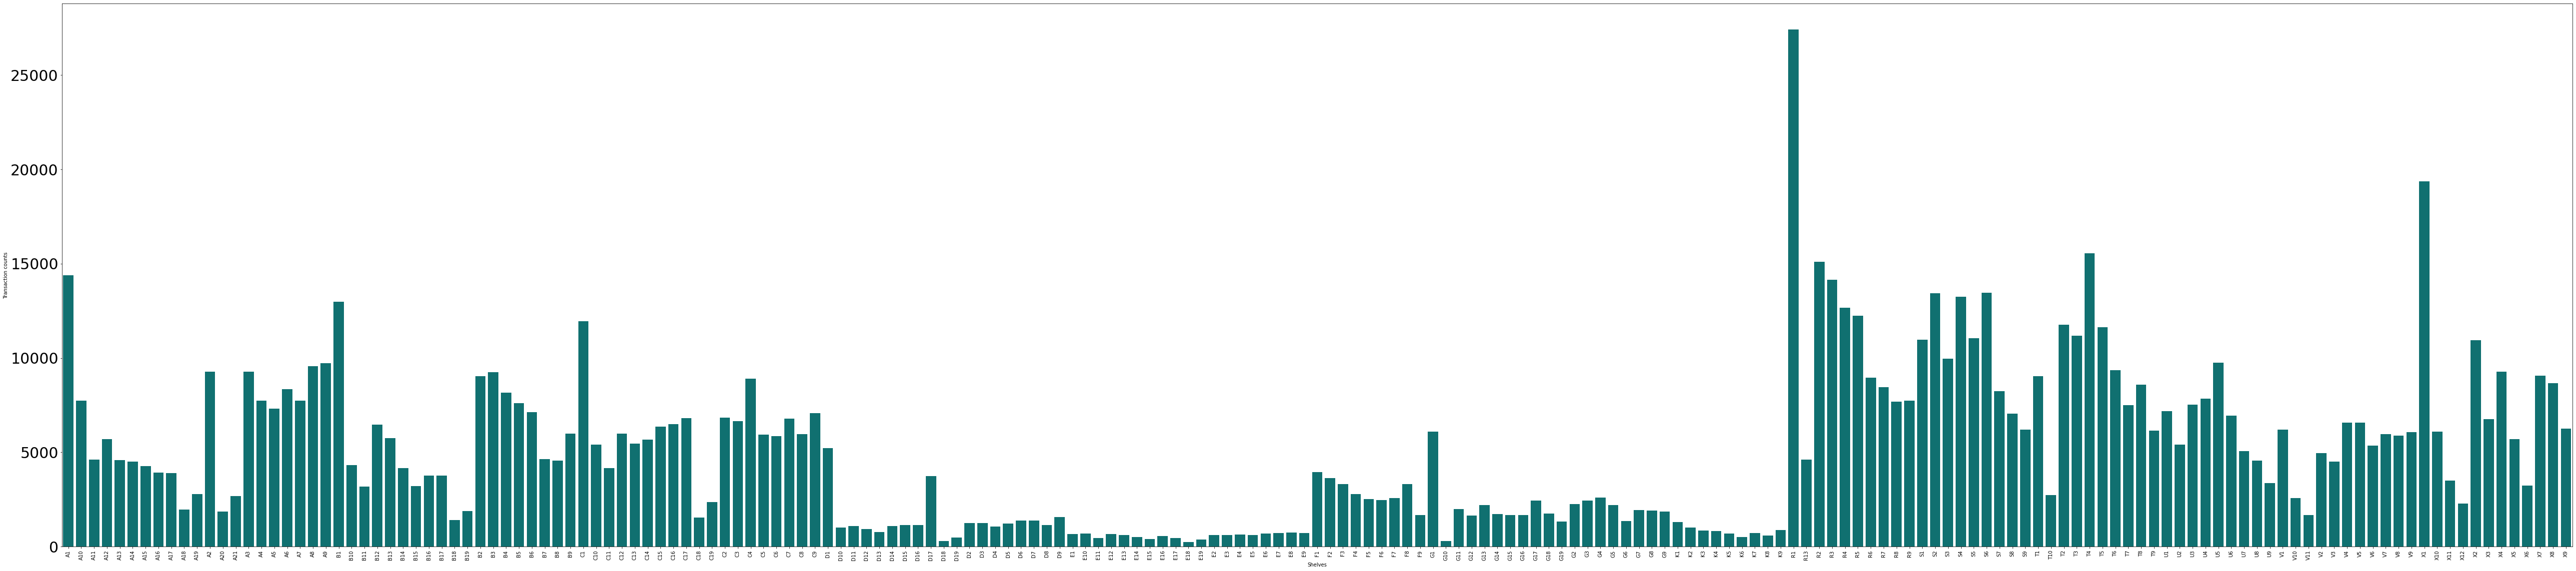

In [72]:
plt.figure(figsize=(90,20))
plt.xticks(rotation = 90)
sns.barplot(x= "bin", y = "qty", data = trans_for_bin_t1, color="teal")
plt.yticks(fontsize=30)
plt.xlabel("Shelves")
plt.ylabel("Transaction counts")
plt.show();

# Visualization of the Transactions by Most Used 20 Motor Names


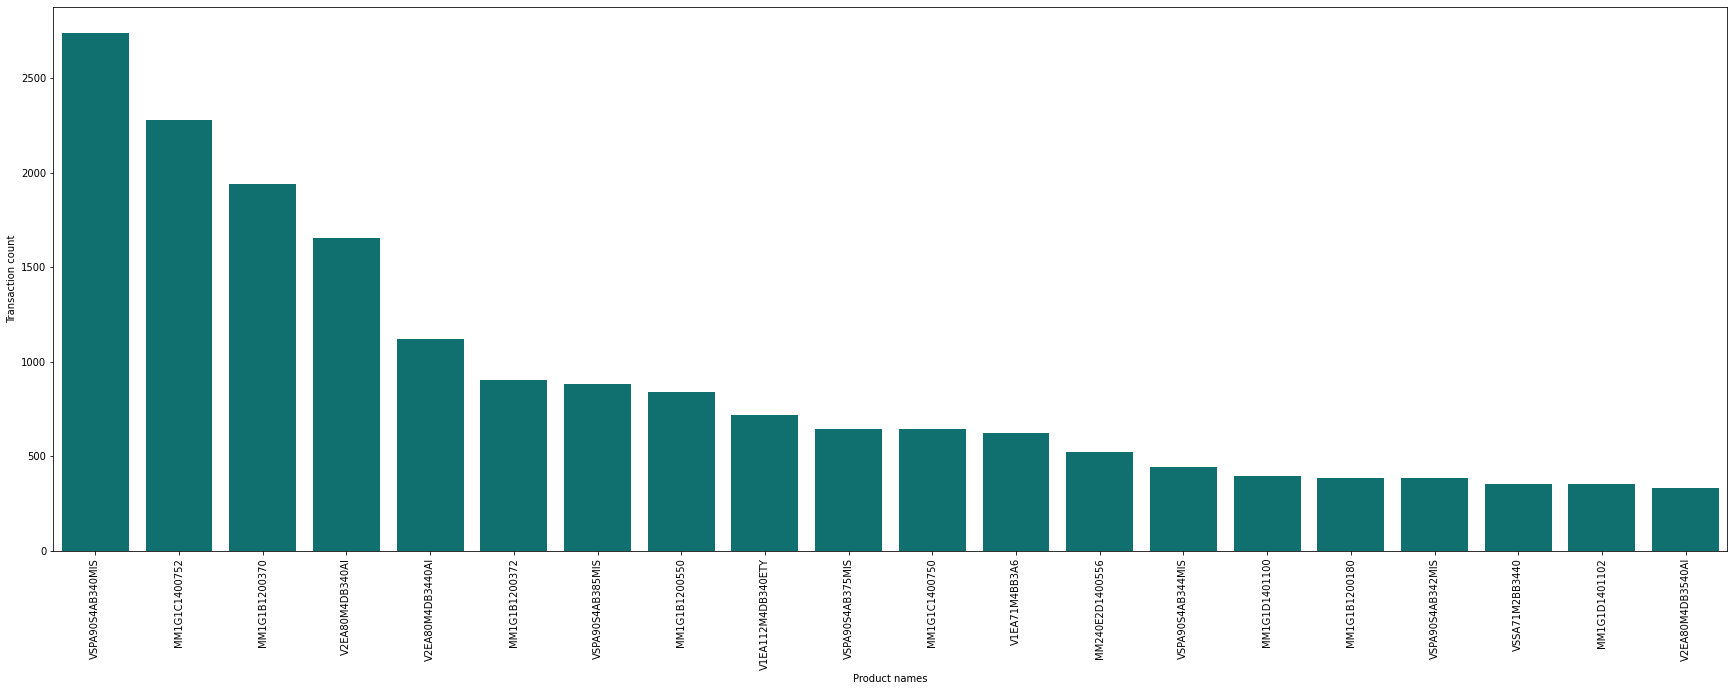

In [73]:
a = depogecmisi_v2.loc[depogecmisi_v2["bin"] == "R1"][["material","qty","bin"]].groupby("material").sum().sort_values(ascending=False,by="qty").reset_index(drop=False)
plt.figure(figsize=(30,10))
sns.barplot(x="material", y="qty",data=a.iloc[:20,:], color ='teal')
plt.xticks(rotation = 90)
plt.xlabel("Product names")
plt.ylabel("Transaction count")
plt.show();

# Visualization of the Transactions by Most Used 20 Shelves


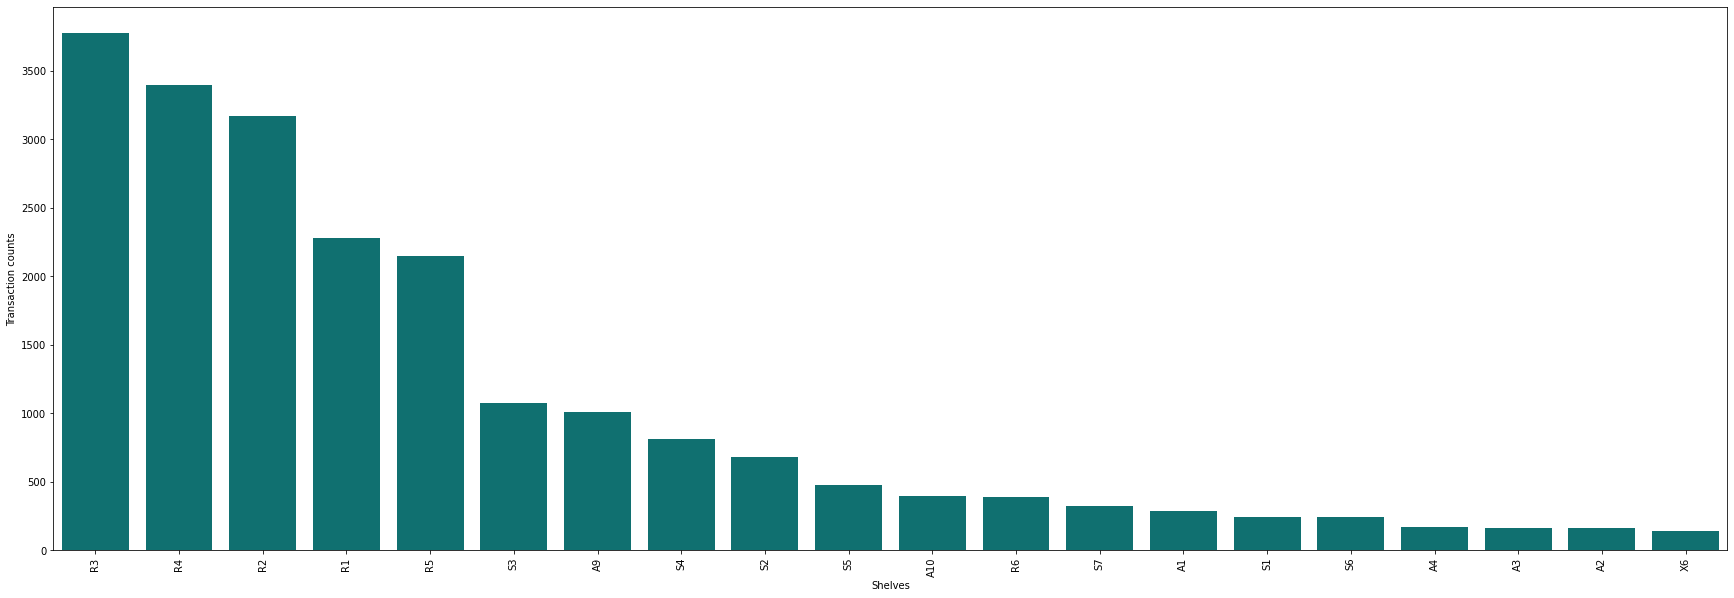

In [74]:
b = depogecmisi_v2.loc[depogecmisi_v2["material"] == a.iloc[1,0]][["material","qty","bin"]].groupby("bin")[["qty"]].sum().sort_values(by="qty",ascending=False).reset_index(drop=False)
plt.figure(figsize=(30,10))
sns.barplot(x="bin",y="qty", color ='teal', data=b.iloc[:20,:])
plt.xticks(rotation = 90)
plt.xlabel("Shelves")
plt.ylabel("Transaction counts")
plt.show();

Shelve Matrix (Meter)





In [27]:
sm.head(1)

,Unnamed: 0,Entrance,A1,A2,A3,A4,A5,A6,A7,A8,...,V9,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,Entrance,0.0,13.3,16.1,18.9,21.7,24.5,27.3,30.1,32.9,...,64.05,44.8,47.6,50.4,53.2,56.0,58.8,61.6,64.4,67.2


In [28]:
sm.rename(columns = {'Unnamed: 0':'Name'}, inplace = True)

In [29]:
sm[["Entrance"]].describe()

,Entrance
count,189.000000
mean,46.974074
std,15.004635
min,0.000000
25%,36.750000
50%,47.600000
75%,58.100000
max,79.450000


In [30]:
scaler=MinMaxScaler()
sm[["Scaled"]] = scaler.fit_transform(sm[["Entrance"]])
sm_new = sm[['Name', 'Scaled']]
sm_new.head(5)

,Name,Scaled
0,Entrance,0.000000
1,A1,0.167401
2,A2,0.202643
3,A3,0.237885
4,A4,0.273128


In [31]:
sm[["Scaled","Entrance"]].describe()

,Scaled,Entrance
count,189.000000,189.000000
mean,0.591241,46.974074
std,0.188856,15.004635
min,0.000000,0.000000
25%,0.462555,36.750000
50%,0.599119,47.600000
75%,0.731278,58.100000
max,1.000000,79.450000


In [32]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
depogecmisi_v2.dtypes

material          object
bin               object
sys_date          object
operation_type    object
qty                int64
serial_id          int64
bins              object
dtype: object

In [34]:
from sklearn.cluster import DBSCAN

my_dbscan = DBSCAN(eps=0.3, min_samples=2).fit(depogecmisi_t1_pv_scaled.iloc[:,1:])
cluster_dbscan = pd.concat([depogecmisi_t1_pv_scaled,pd.DataFrame(data=my_dbscan.labels_, columns=["CLUSTER"])],axis=1)

cluster_dbscan.groupby("CLUSTER").count().sort_values(by="A1",ascending=False).iloc[:,:1].T

CLUSTER,-1,10,0,148,112,22,12,57,126,103,...,136,132,127,124,119,118,115,113,109,246
material,1143,474,34,23,23,19,15,14,14,13,...,2,2,2,2,2,2,2,2,2,2


#Used Methodology

**Silhoutte Score**

In [35]:
def silhoutte_plt(my_df,min_n=2, max_n=30, size=[100,20]):
  try:
    my_material = my_df["material"]
    my_clusters = my_df["CLUSTER"]
    my_df.drop(columns=["material","CLUSTER"],inplace=True)
  except:
    pass
  scores = []
  for num_clusters in range(min_n,max_n):
      clusterer = KMeans(n_clusters=num_clusters, random_state=0)
      pred = clusterer.fit_predict(my_df)
      scores.append(silhouette_score(my_df, pred, metric='euclidean'))
  
  try:
    my_df["material"] = my_material
    my_df["CLUSTER"] = my_clusters
    my_df.set_index("material",inplace=True)
    my_df.reset_index(drop=False,inplace=True)
  except:
    pass
  
  plt.figure(figsize=(size[0], size[1]), dpi=100)
  plt.plot(scores, 'b*-')
  plt.xticks(np.arange(len(scores)), np.arange(2, len(scores) +2) )
  plt.grid(True)
  plt.title('Silhouette Score')
  plt.xlabel('n of clusters')
  plt.ylabel('Scores')
  plt.show()

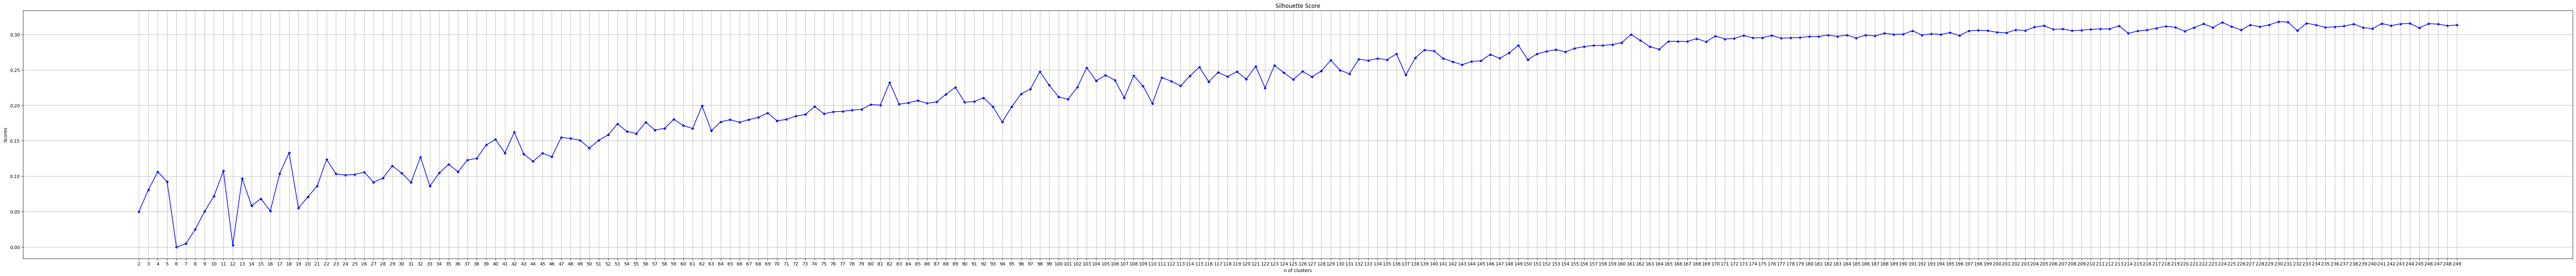

In [ ]:
silhoutte_plt(depogecmisi_t1_pv_scaled.set_index("material"), 2, 250, [100,10])

**K-Means**

In [36]:
def apply_kmeans(my_df, n_cluster):
  try:
    my_clusters = my_df["CLUSTER"]
    my_df.drop(columns=["CLUSTER"],inplace=True)
  except:
    pass

  kmeans = KMeans(n_clusters=n_cluster,random_state=0)
  kmeans.fit(my_df.iloc[:,1:])

  clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[(my_df.iloc[:,1:]).columns])
  y_kmeans = kmeans.fit_predict(my_df.iloc[:,1:])

  try:
    my_df["CLUSTER"] = my_clusters
  except:
    pass

  data_with_cluster = pd.concat([my_df, pd.DataFrame({'CLUSTER': kmeans.labels_})], axis=1)
  return data_with_cluster

In [37]:
depogecmisi_t1_kmeans = apply_kmeans(depogecmisi_t1_pv_scaled,140)

In [38]:
pd.set_option('display.max_columns', 500)
depogecmisi_t1_kmeans.groupby("CLUSTER").count().sort_values(by="A1",ascending=False).iloc[:,:1].T

CLUSTER,57,98,24,46,54,28,3,1,16,73,82,124,7,22,31,12,19,70,127,9,56,15,26,119,72,8,55,97,129,40,32,0,2,13,30,137,133,88,112,76,11,5,21,109,63,45,77,58,23,99,61,87,118,25,62,34,18,6,69,44,78,85,33,102,116,86,27,39,139,29,91,49,36,20,104,128,14,136,96,59,37,115,71,100,52,51,38,111,117,43,10,41,47,42,81,79,113,138,84,35,53,110,74,75,92,90,101,130,120,89,134,135,132,66,95,80,67,48,65,68,17,106,83,126,108,50,94,60,125,122,121,105,107,64,114,103,131,93,123,4
material,744,112,65,49,40,39,37,36,31,28,27,26,26,26,25,23,23,23,22,22,21,21,20,20,19,19,18,18,18,18,18,18,18,18,17,17,17,17,16,16,16,15,15,15,15,15,15,15,15,14,14,14,14,14,13,13,13,13,13,13,12,12,12,12,12,12,12,12,11,11,11,11,11,11,11,11,11,11,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,6,6,6,5,5,5,5,5,5,5,5,5,4,4,4,4,4,3,3


In [39]:
depogecmisi_t1_kmeans.loc[depogecmisi_t1_kmeans["CLUSTER"] == 25].replace(0,np.nan).dropna(axis=1,how="all").iloc[:15,:]

,material,A3,C14,D18,D19,E13,E19,G19,G2,G5,K4,R1,R6,R9,S1,S4,U1,X6,CLUSTER
613,V1EA132M4BB540DOA,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
996,V2EA100M4CB340AA,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
1622,V3EA100L4CB3401EDY,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,25
1655,V3EA100L4HB340YYBD,NaN,0.041667,NaN,NaN,NaN,0.041667,0.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
1806,V3EA132M4AB54CU,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
1941,V3EA160L2GB340CC,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
2225,V3EA90L4AB3440FJY,NaN,NaN,0.014815,NaN,NaN,NaN,0.444444,NaN,NaN,NaN,NaN,0.014815,0.274074,0.014815,0.237037,NaN,NaN,25
2319,V3EA90S6CB3440FJY,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
2321,V3EA90S6CB3540FJY,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.25,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,25
2477,V4EA100L2EB501AE,NaN,NaN,NaN,NaN,0.166667,NaN,0.750000,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25


In [58]:
def which_hall(my_df):
  my_zeros = np.zeros((my_df.shape[0],1),dtype="float64")
  my_columns = list(my_df.columns)
  try:
    my_columns.remove("material")
    my_columns.remove("CLUSTER")
  except:
    pass
  my_df["Hall-1"] = my_zeros
  my_df["Hall-2"] = my_zeros
  my_df["Hall-3"] = my_zeros
  my_df["Hall-4"] = my_zeros
  my_df["Hall-5"] = my_zeros
  my_df["Hall-6"] = my_zeros
  my_df["Hall-7"] = my_zeros
  my_df["Hall-8"] = my_zeros
  my_diff_bins = list()
  for i in range(1,9):
    my_diff_bins.append(f"G{i}")
    my_diff_bins.append(f"R{i}")

  for i in (list(my_columns)):
    if i.startswith("A") or i.startswith("B"):
      my_df["Hall-1"] += my_df[i]
    elif i.startswith("C") or i.startswith("D"):
      my_df["Hall-2"] += my_df[i]
    elif i.startswith("E") or i.startswith("F") or i.startswith("K"):
      my_df["Hall-3"] += my_df[i]
    elif i.startswith("S") or i.startswith("T"):
      my_df["Hall-6"] += my_df[i]
    elif i.startswith("U") or i.startswith("V"):
      my_df["Hall-7"] += my_df[i]
    elif i.startswith("X"):
      my_df["Hall-8"] += my_df[i]
    else:
      if any(word in i for word in my_diff_bins):
        my_df["Hall-4"] += my_df[i]
      else:
        my_df["Hall-5"] += my_df[i]

  return my_df

In [59]:
my_df2 = depogecmisi_t1_kmeans.copy(deep=True)

In [60]:
my_df2 = which_hall(my_df2.loc[my_df2["CLUSTER"]== 19].replace(0,np.nan).dropna(axis=1,how="all").replace(np.nan,0).reset_index(drop=True))

In [43]:
my_df2

,material,A13,A6,B4,D13,E13,F1,G18,G3,G4,G8,T2,CLUSTER,Hall-1,Hall-2,Hall-3,Hall-4,Hall-5,Hall-6,Hall-7,Hall-8
0,MM1G1B1400253,0.407767,0.000,0.016181,0.000000,0.000000,0.000000,0.000000,0.576052,0.000000,0.000000,0.0,18,0.423948,0.000000,0.000000,0.576052,0.0,0.0,0.0,0.0
1,MT41DP1430000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,18,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0
2,V1EA100L84BB341YY,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,18,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0
3,V1EA80M4HB340YYBD,0.000000,0.000,0.000000,0.000000,0.000000,0.307692,0.000000,0.615385,0.076923,0.000000,0.0,18,0.000000,0.000000,0.307692,0.692308,0.0,0.0,0.0,0.0
4,V1EA90L84AB3440YY,0.000000,0.000,0.000000,0.000000,0.020619,0.000000,0.020619,0.742268,0.000000,0.216495,0.0,18,0.000000,0.000000,0.020619,0.979381,0.0,0.0,0.0,0.0
5,V2EA100L4DB340EOY,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,18,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0
6,V2EA132S2BB540AICC,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,18,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0
7,V2EA80M2AB340YY,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,18,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0
8,V2EG225S6BB340,0.000000,0.000,0.000000,0.090909,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000,0.0,18,0.000000,0.090909,0.000000,0.909091,0.0,0.0,0.0,0.0
9,V3EA100L4CB540YYDE,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.5,18,0.000000,0.000000,0.000000,0.500000,0.0,0.5,0.0,0.0


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (21). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (22). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


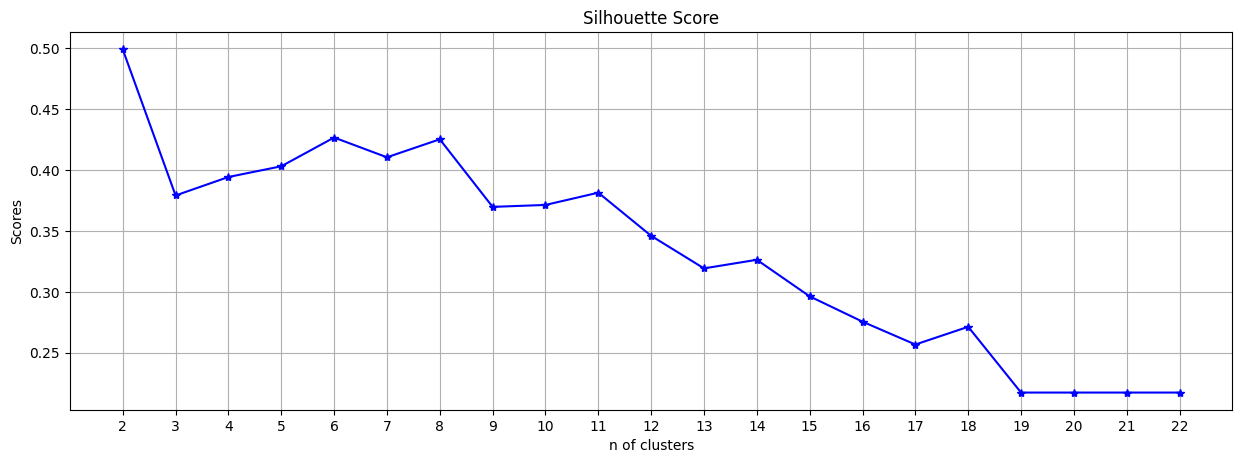

In [62]:
silhoutte_plt(my_df2.iloc[:,:-1].set_index("material"), 2, 23, [15,5])

In [63]:
my_df2 = apply_kmeans((my_df2.drop(columns=["CLUSTER"])),7)

In [64]:
my_df2.iloc[:4,-10:]

,X9,Hall-1,Hall-2,Hall-3,Hall-4,Hall-5,Hall-6,Hall-7,Hall-8,CLUSTER
0,0.0,0.0,0.906832,0.000000,0.093168,0.0,0.0,0.0,0.0,6
1,0.0,0.0,0.964789,0.035211,0.000000,0.0,0.0,0.0,0.0,4
2,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4
3,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4


In [67]:
my_df2.groupby("CLUSTER").count().sort_values(by="C1",ascending=False).iloc[:,:1].T

CLUSTER,0,4,2,1,3,5,6
material,9,5,4,2,1,1,1


#Recommendation


* Additional studies should be carried out to develop the recommendation system 

and achieve results.

In [20]:
def recommendation(my_id,depogecmisi_t1_kmeans,my_df2,shelves):
    cluster = depogecmisi_t1_kmeans.loc[depogecmisi_t1_kmeans["material"]== my_id]["CLUSTER"].reset_index(drop=True)[0]
    if cluster == 18:
      Hall_1,Hall_2,Hall_3,Hall_4,Hall_5,Hall_6,Hall_7,Hall_8 = my_shelves_halls(shelves)
      my_df = my_df2.drop(columns=["material"])
      cluster2 = my_df2.loc[my_df2["material"]== my_id]["CLUSTER"].reset_index(drop=True)[0]
      a = my_df.loc[my_df["CLUSTER"] == cluster2].iloc[:,-9:-1].sum(axis=0).max()
      b = my_df.loc[my_df["CLUSTER"] == cluster2].iloc[:,-9:-1].sum(axis=0).reset_index(drop=False)
      hall_no = b.loc[b[0]==a]["index"].reset_index(drop=True)[0]

#Conclusion and Future Works


*   Better constraints can be achieved by adding different clustering classes.
*   A model can be developed that gives which regions it should be placed according to the engine specifications.By considering classes such as motor body, kW, flange, efficiency class, number of poles, the placement of new motors can be ensured.(Recommendation System)



# Result
* When the order of movements in the warehouse is examined, it has been observed that certain engines and shelves are used more actively. It may be possible to get better results with improvements to be made on the models.

#Reference


*  VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".
*  scikit-learn.org/stable/modules/clustering.html
* Sahin Y.(2013). Genetic Algorithm Based Approaches for Planning Warehouse Operations 

